# Temperature Forecast 

In [2]:
pip install --upgrade bottleneck


     -------------------------------------- 110.1/110.1 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('temperature.csv')

In [6]:
data.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [8]:
data.shape

(7752, 25)

In [11]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We see few null values here,Im going to drop date from it firstly.

In [16]:
data.drop("Date", axis=1,inplace = True)

In [17]:
data.isna().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are still many null values, we're going to add median value to all null values.

In [30]:
def treat_nan(df):
    for i in df.columns:
        df[i] = df[i].fillna(df[i].median())



In [31]:
treat_nan(data)

In [32]:
data.isna().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Correlation between next MIN and MAX

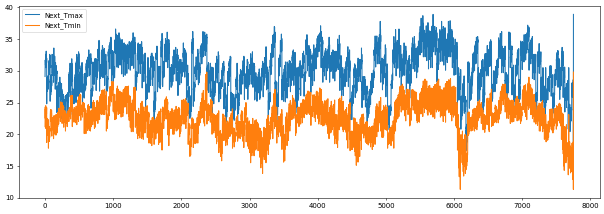

In [34]:
plt.figure(figsize=(15,5), dpi=50)
plt.plot(data["Next_Tmax"], label="Next_Tmax")
plt.plot(data["Next_Tmin"],label = "Next_Tmin")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

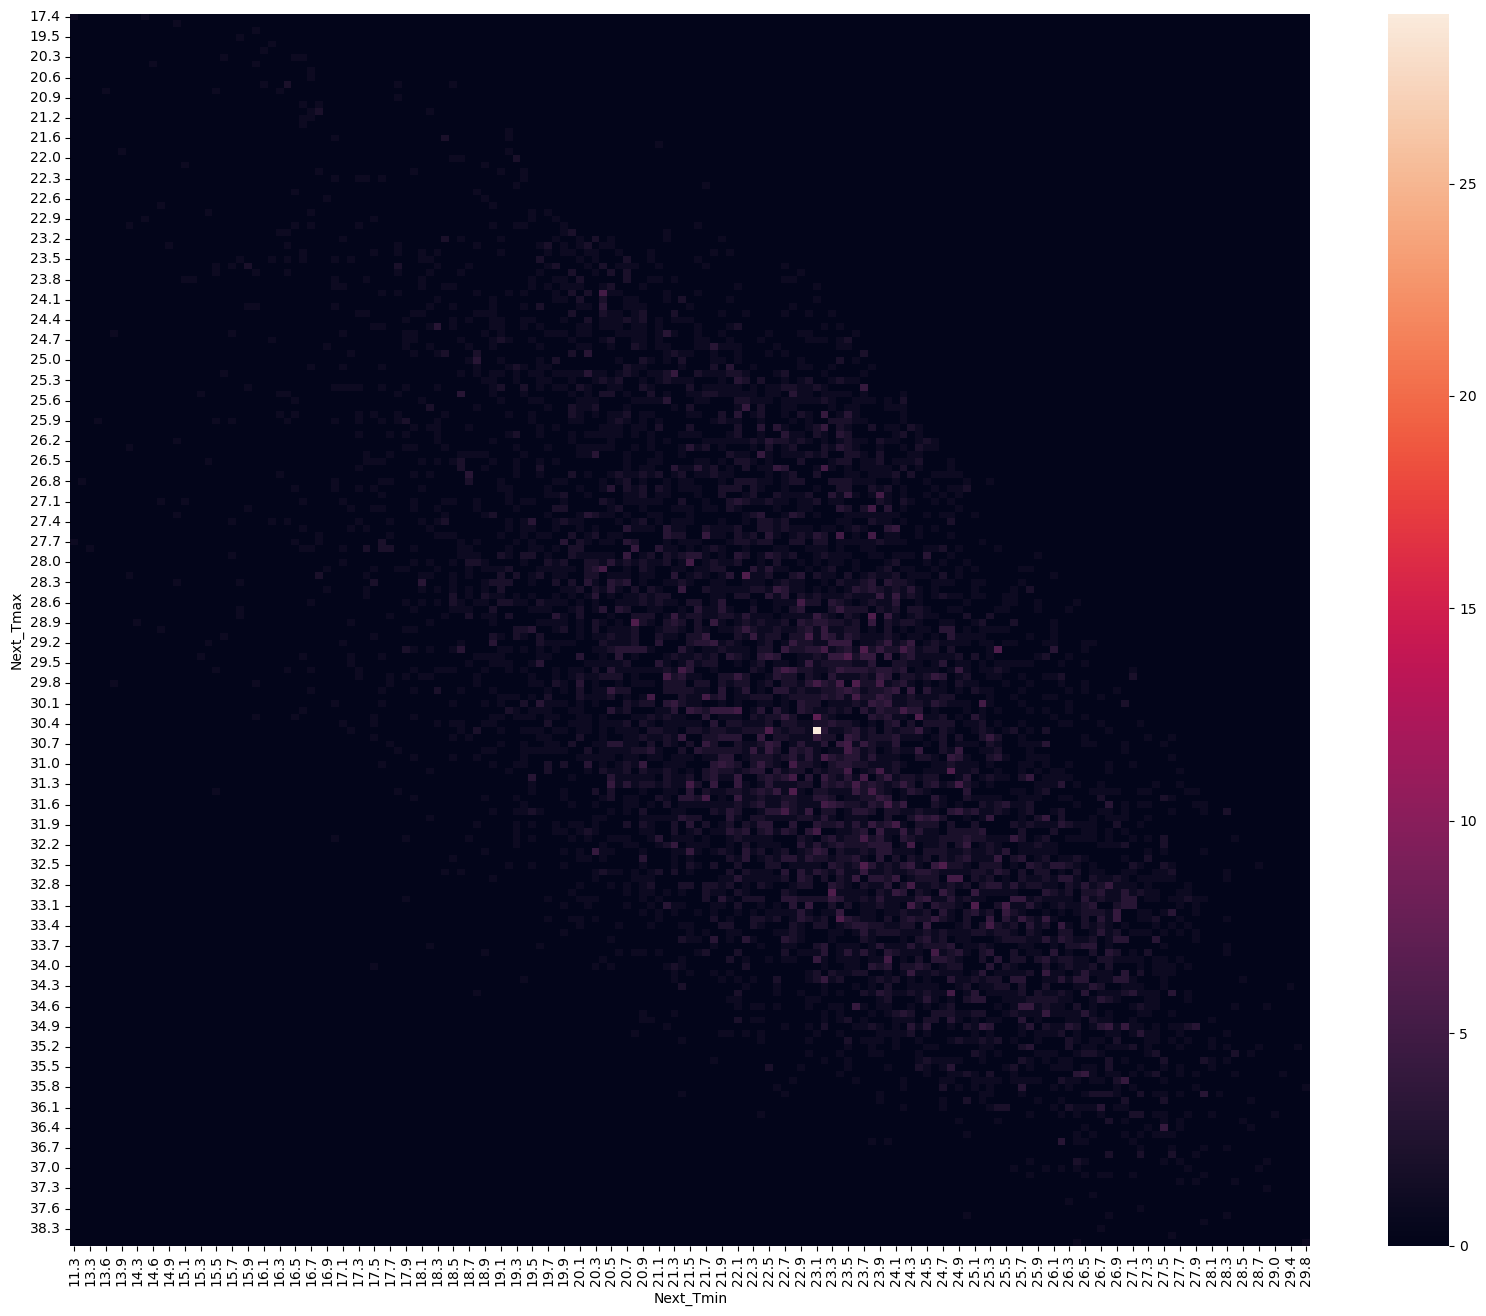

In [49]:
plt.figure(figsize=(20,16),dpi=100)
sns.heatmap(pd.crosstab(data["Next_Tmax"],data["Next_Tmin"]))
plt.show

Correlation Matrix

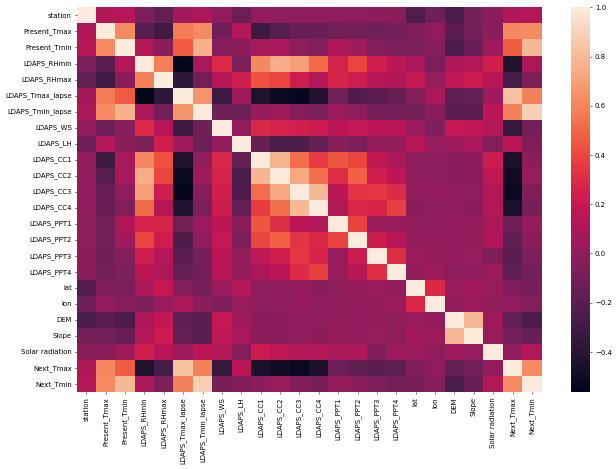

In [53]:
cor=data.corr()
plt.figure(figsize=(15,10), dpi =50)
sns.heatmap(cor)
plt.show()

Present Tmax and present Tmin impacts Next temperature more (highly +ve)
LDAPS lapse (around 0.6)
cloud cover having very high negative corelation, precipitation has -ve corelation
solar radiation is almost having no effect on temp
demographic and geographic feature have negative corelation

Splitting of Data

In [54]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size=0.2,random_state=0)

In [55]:
test.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
4271,22.0,32.1,24.5,63.083488,83.169289,27.043221,24.184606,4.613474,69.023742,0.319488,...,1.780828,0.0,0.000000,37.5102,127.086,21.9668,0.1332,4987.023438,31.9,21.3
971,22.0,32.7,24.9,57.288948,89.839920,33.530312,27.405979,8.275806,72.596921,0.299611,...,0.000000,0.0,0.000000,37.5102,127.086,21.9668,0.1332,5228.346680,34.6,27.2
7541,17.0,31.7,21.3,81.746681,90.070435,29.039634,23.828240,6.686319,38.842143,0.324799,...,0.200888,0.0,0.069036,37.6181,127.099,53.4712,0.6970,4765.267578,29.7,22.2
4806,7.0,26.4,20.5,68.170364,93.259880,25.199747,20.782339,3.917524,63.849919,0.567421,...,0.002380,0.0,0.000000,37.5776,126.838,12.3700,0.0985,5799.268066,29.6,20.3
2048,24.0,30.0,25.0,56.149647,91.013557,30.304948,24.716520,6.070194,43.157278,0.139779,...,0.000000,0.0,0.000000,37.5237,126.909,17.2956,0.2223,5646.496582,32.0,24.8


In [58]:
def get_X_y(data):
    X= data.drop(["Next_Tmax","Next_Tmin"], axis=1)
    y_max= data["Next_Tmax"]
    y_min=data["Next_Tmin"]
    
    return X,y_max,y_min

In [59]:
X_train, y_max_train, y_min_train =get_X_y(train)
X_test, y_max_test, y_min_test = get_X_y(test)

In [60]:
y_min_train[:5]

6446    23.1
3253    21.4
4900    22.6
5475    22.0
3735    24.1
Name: Next_Tmin, dtype: float64

In [61]:
y_max_train[:5]

6446    26.9
3253    29.9
4900    31.1
5475    30.6
3735    30.9
Name: Next_Tmax, dtype: float64

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
max_model = LinearRegression()

In [64]:
max_model.fit(X_train,y_max_train)

LinearRegression()

In [65]:
y_max_pred = max_model.predict(X_test)
max_model.score(X_test,y_max_test) # Accuracy

0.7801527902549255

In [66]:
initial_score = max_model.score(X_test,y_max_test) * 100
initial_score

78.01527902549255

Therefore, that is the accuracy of the Linear Regression model predicting Maximum Next Day Temperature.

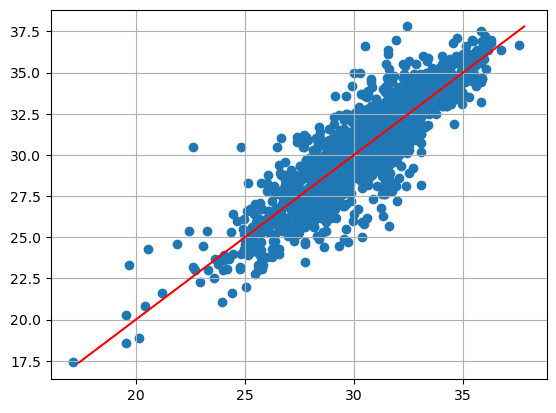

In [67]:
plt.scatter(y_max_pred, y_max_test)
X=[min(y_max_test), max(y_max_test)]
y=[min(y_max_test), max(y_max_test)]
plt.grid()
plt.plot(X,y, color="red")

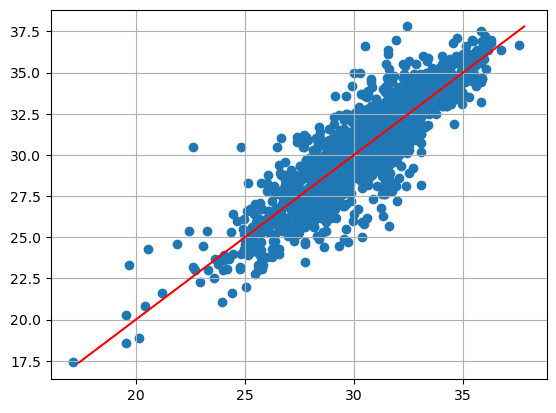

In [68]:
plt.scatter(y_max_pred, y_max_test)
X=[min(y_max_test), max(y_max_test)]
y=[min(y_max_test), max(y_max_test)]
plt.grid()
plt.plot(X,y, color="red")

The above plot shows the distribution of the y_test and y_pred.

Ideally, we want all the dots to be along the diagonal (which means y_test is y_pred)

In [69]:
from sklearn.metrics import mean_squared_error as mse

In [70]:
mse(y_max_test,y_max_pred) 

2.1575934797048513

Mean squared error

In [71]:
mse(y_max_test,y_max_pred) ** 1/2

1.0787967398524256

Squared mean squared error

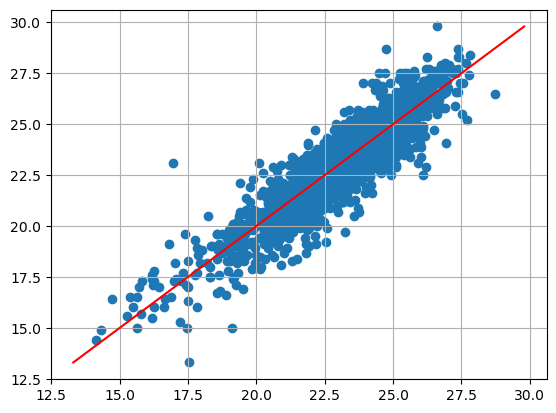

0.5381163561637842

In [73]:
min_model = LinearRegression()
min_model.fit(X_train, y_min_train)
y_min_pred = min_model.predict(X_test)
plt.scatter(y_min_pred, y_min_test)

X=[min(y_min_test), max(y_min_test)]
y=[min(y_min_test), max(y_min_test)]

plt.grid()
plt.plot(X,y, color="red")
plt.show()



mse(y_min_pred, y_min_test) ** 1/2 # RMSE

In [75]:
'MIN Model Accuracy: ' + str(min_model.score(X_test, y_min_test).round(4) * 100) + '%'

'MIN Model Accuracy: 82.57%'

Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.1, 1, 10, 100, 1000]:
	lasso = Lasso(alpha=alpha)
	lasso.fit(X_train, y_max_train)
	y_pred = lasso.predict(X_test)
	scores.append(lasso.score(X_test, y_max_test))
print(scores)

[0.744475560911613, 0.7107505888614956, 0.1874881551410107, -0.000775468247602884, -0.000775468247602884]


Ridge Regression

In [78]:
from sklearn.linear_model import Ridge

In [79]:
scores = []
for alpha in [0.1, 1, 10, 100, 1000]:
	ridge = Ridge(alpha=alpha)
	ridge.fit(X_train, y_max_train)
	y_pred = ridge.predict(X_test)
	scores.append(ridge.score(X_test, y_max_test))
print(scores)

[0.7801494643677442, 0.7801185670448958, 0.7797521328998476, 0.7760282936761196, 0.7598747556632334]


In [82]:
from sklearn.model_selection import GridSearchCV


In [83]:
param_grid = param_grid = {
    'fit_intercept': [True, False], # Fit the intercept too
    'alpha': [0.5, 0.75, 1, 1.25],
    'solver': ["sag", "lsqr"],
    #'max_iter':[1000]
}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, )
ridge_cv.fit(X_train, y_max_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

{'alpha': 1.25, 'fit_intercept': True, 'solver': 'lsqr'} 0.762737619568964


C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The Best parameters and it's score

In [84]:
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 1.25, 'fit_intercept': True, 'solver': 'lsqr'} 0.762737619568964


The Best Model and it's Accuracy

In [86]:
best_model = ridge_cv.best_estimator_

best_accuracy = ridge_cv.best_score_

In [87]:
best_accuracy - initial_score
improvement = best_accuracy / (initial_score + best_accuracy) * 100
improvement

0.9682112498535199

In [88]:
improvement*100

96.82112498535199

The Final accuracy is 96.82%